<h1>SER - Speech Emotion Recognition</h1>
<h2 style="color:red">-Nagarjuna Padala</h2>
<h2 style="color:red">-Trinadh Kumar Atmuri</h2>

<p>We are utilizing a CNN model to conduct Speech Emotion Recognition (SER) on the following datasets provided</p>
<ul>
    <li>RAVDESS - Ryerson Audio-Visual Database of Emotional Speech and Song</li>
    <li>Crema-D - Crowd-sourced Emotional Mutimodal Actors Dataset</li>
    <li>SAVEE - Surrey Audio-Visual Expressed Emotion</li>
    <li>TESS - Toronto emotional speech set</li>
<ul>

<p> We are utilizing the following libraries<p>
<ul>
    <li>os - provides operating system dependent functionality.</li>
    <li>pandas - generate summary statistics of numerical data in a DataFrame</li>
    <li>numpy - for numerical computing and array manipulation</li>
    <li>librosa - package for audio analysis</li>
    <li>seaborn - visualization library based on Matplotlib</li>
    <li>focal_loss - tool for implementing the Focal Loss function</li>
    <li>tensorflow - for machine learning and deep learning tasks</li>
    <li>warnings - manages warning messages</li>
    <li>sys - used to access to system-specific parameters</li>
    <li>matplotlib - for graph visualizations</li>
    <li>Ipython - displaying rich media representations</li>
    <li>sklearn - for data analysis and modeling</li>
    <li>keras - rapid prototyping of deep learning models</li>
</ul>

<p>Most of libraries are available with conda or python version if you face any issuses please install those modules</p>
<p>Below we are installing which are not installed by default</p>

In [18]:
!python3 -m pip install --upgrade pip

In [19]:
%pip install librosa
%pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
%pip install seaborn
%pip install focal_loss

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<p>Disabling warnings</p>

In [21]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

<h2>Fetching Data</h2>

In [22]:
# All data is saved on the "DataSets" directory
import os

dataSetDirectoryPath = "DataSets/"

<h3>RAVDESS</h3>

<p>We downloaded the RAVDESS dataset from this link <a href="https://zenodo.org/records/1188976">RAVDESS dataset</a></p>
<p>We only considered the audio speech samples which consist of 24 actors with two different texts statements, two different emotional intensity, and with eight different emotions</p>
<p>Data extraction of RAVDESS as follows</p>

In [23]:
RavdessDataSetPath = dataSetDirectoryPath+ "ravdess"
RavdessDataFolders = os.listdir(RavdessDataSetPath)
print("Got the Ravdess data directory")

Got the Ravdess data directory


<h4>Data Manipulation for RAVDESS data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the Ravdess audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Example: 03-01-01-01-01-01-01.wav - in this file name each number represents different parameter. here we are considering the third number which is "01" it tells the emotion of that particular audio.</p>
<p> Where each number represents as follows</p>
<ul>
    <li>01: Neutral</li>
    <li>02: Calm</li>
    <li>03: Happy</li>
    <li>04: Sad</li>
    <li>05: Anger</li>
    <li>06: Fear</li>
    <li>07: Disgust</li>
    <li>08: Surprise</li>
</ul>

In [24]:
RavdessEmotion =[]
RavdessFilePaths=[]

for eachFolder in RavdessDataFolders:
    if not eachFolder.startswith("."):
        filesInFolder = os.listdir(RavdessDataSetPath+'/'+eachFolder)
        for eachFileName in filesInFolder:
            if eachFileName.endswith(".wav"):
                splitFileName = eachFileName.split(".")
                splitNameToExtractEmotions = splitFileName[0].split("-")
                fileEmotion = int(splitNameToExtractEmotions[2])
                RavdessEmotion.append(fileEmotion)
                RavdessFilePaths.append(RavdessDataSetPath+'/'+eachFolder+"/"+eachFileName)
print("Completed the extraction of RAVDESS emotions based on the files")

Completed the extraction of RAVDESS emotions based on the files


In [25]:
# Place the extracted data in the data frames

import pandas as pd

RavdessEmotionsDataFrame = pd.DataFrame(RavdessEmotion, columns=['Emotions'])
RavdessPathDataFrame = pd.DataFrame(RavdessFilePaths, columns=['FilePath'])

RavdessDataFrame = pd.concat([RavdessEmotionsDataFrame, RavdessPathDataFrame], axis=1)

RavdessDataFrame.head()



,Emotions,FilePath
0,5,DataSets/ravdess/Actor_16/03-01-05-01-02-01-16...
1,6,DataSets/ravdess/Actor_16/03-01-06-01-02-02-16...
2,6,DataSets/ravdess/Actor_16/03-01-06-02-01-02-16...
3,5,DataSets/ravdess/Actor_16/03-01-05-02-01-01-16...
4,7,DataSets/ravdess/Actor_16/03-01-07-01-01-01-16...


In [26]:
# Replace emotion number with emotion string
mappedEmotionStrings = {1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}
RavdessDataFrame['Emotions'].replace(mappedEmotionStrings, inplace=True)
RavdessDataFrame.head()

,Emotions,FilePath
0,angry,DataSets/ravdess/Actor_16/03-01-05-01-02-01-16...
1,fear,DataSets/ravdess/Actor_16/03-01-06-01-02-02-16...
2,fear,DataSets/ravdess/Actor_16/03-01-06-02-01-02-16...
3,angry,DataSets/ravdess/Actor_16/03-01-05-02-01-01-16...
4,disgust,DataSets/ravdess/Actor_16/03-01-07-01-01-01-16...


In [27]:
print(RavdessDataFrame.Emotions.value_counts())

Emotions
angry       192
fear        192
disgust     192
sad         192
surprise    192
happy       192
calm        192
neutral      96
Name: count, dtype: int64


<h3>CREMA D</h3>

<p>We downloaded the CREMA D dataset from this link <a href="https://paperswithcode.com/dataset/crema-d">CREMA D dataset</a></p>
<p>We only considered the audio speech samples which consist of 91 actors with 12 different texts statements, four different emotional intensity, and with six different emotions</p>
<p>Data extraction of CREMA D as follows</p>

In [28]:
CremaDataSetPath = dataSetDirectoryPath+ "CREMA-D"
CremaDataFilesFolder = os.listdir(CremaDataSetPath)
print("Got the CREMA D data directory")

Got the CREMA D data directory


<h4>Data Manipulation for CREMA D data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the CREMA D audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Example: 1001_DFA_ANG_XX.wav - if we see the third string, it has "ANG" it represents the emotions of the audio file.</p>
<p> Where each abbreviation of emotion represents as follows</p>
<ul>
    <li>ANG: Anger</li>
    <li>DIS: Disgust</li>
    <li>SAD: Sad</li>
    <li>FEA: Fear</li>
    <li>HAP: Happy</li>
    <li>NEU: Neutral</li>
</ul>

In [29]:
CremaDEmotion =[]
CremaDFilePaths=[]

for eachFileName in CremaDataFilesFolder:
    if eachFileName.endswith(".wav"):
        splitFileName = eachFileName.split(".")
        splitNameToExtractEmotions = splitFileName[0].split("_")
        fileEmotion = splitNameToExtractEmotions[2]
        if fileEmotion == 'ANG':
            CremaDEmotion.append('angry')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'DIS':
            CremaDEmotion.append('disgust')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'SAD':
            CremaDEmotion.append('sad')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'FEA':
            CremaDEmotion.append('fear')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'HAP':
            CremaDEmotion.append('happy')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
        elif fileEmotion == 'NEU':
            CremaDEmotion.append('neutral')
            CremaDFilePaths.append(CremaDataSetPath+'/'+eachFileName)
print("Completed the extration of CREMA D emotions based on the files")

Completed the extration of CREMA D emotions based on the files


In [30]:
CreamDEmotionsDataFrame = pd.DataFrame(CremaDEmotion, columns=['Emotions'])
CreamDPathDataFrame = pd.DataFrame(CremaDFilePaths, columns=['FilePath'])

CreamDDataFrame = pd.concat([CreamDEmotionsDataFrame, CreamDPathDataFrame], axis=1)

CreamDDataFrame.head()

,Emotions,FilePath
0,angry,DataSets/CREMA-D/1022_ITS_ANG_XX.wav
1,angry,DataSets/CREMA-D/1037_ITS_ANG_XX.wav
2,neutral,DataSets/CREMA-D/1060_ITS_NEU_XX.wav
3,neutral,DataSets/CREMA-D/1075_ITS_NEU_XX.wav
4,disgust,DataSets/CREMA-D/1073_IOM_DIS_XX.wav


In [31]:
print(CreamDDataFrame.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
sad        1271
fear       1271
happy      1271
neutral    1087
Name: count, dtype: int64


<h3>SAVEE</h3>

<p>We downloaded the SAVEE dataset from this link <a href="http://kahlan.eps.surrey.ac.uk/savee/">SAVEE dataset</a></p>
<p>We only considered the audio speech samples which consist seven different emotions</p>
<p>Data extraction of SAVEE as follows</p>

In [24]:
SaveePath = dataSetDirectoryPath+ "Savee"
SaveeDataFilesFolder = os.listdir(SaveePath)
print("Got the SAVEE data directory")

Got the SAVEE data directory


<h4>Data Manipulation for SAVEE data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the SAVEE audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Example: DC_a01.wav - if we see the second s[plitted string the letter starts with "a" which means it's an anger emotion based audio</p>
<p> Where each abbreviation of emotion represents as follows</p>
<ul>
    <li>a: Anger</li>
    <li>d: Disgust</li>
    <li>sa: Sad</li>
    <li>f: Fear</li>
    <li>h: Happy</li>
    <li>n: Neutral</li>
    <li>su: Suprise</li>
</ul>

In [25]:

SaveeEmotion = []
SaveeFilePath = []

for eachFileName in SaveeDataFilesFolder:
    extractFilePath = eachFileName.split('_')[1]
    emotionVal = extractFilePath[:-6]
    if emotionVal=='d':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('disgust')
    elif emotionVal=='a':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('angry')
    elif emotionVal=='su':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('surprise')
    elif emotionVal=='h':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('happy')
    elif emotionVal=='sa':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('sad')
    elif emotionVal=='f':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('fear')
    elif emotionVal=='n':
        SaveeFilePath.append(SaveePath+"/" + eachFileName)
        SaveeEmotion.append('neutral')
print("Completed the extration of SAVEE emotions based on the files")      


Completed the extration of SAVEE emotions based on the files


In [26]:
SaveeDataFrame = pd.DataFrame(SaveeEmotion, columns=['Emotions'])
SaveePathDataFrame = pd.DataFrame(SaveeFilePath, columns=['FilePath'])

SaveeDataFrame = pd.concat([SaveeDataFrame, SaveePathDataFrame], axis=1)

SaveeDataFrame.head()

,Emotions,FilePath
0,sad,DataSets/Savee/JK_sa01.wav
1,sad,DataSets/Savee/JK_sa15.wav
2,neutral,DataSets/Savee/DC_n13.wav
3,surprise,DataSets/Savee/DC_su09.wav
4,neutral,DataSets/Savee/DC_n07.wav


In [27]:
print(SaveeDataFrame.Emotions.value_counts())

Emotions
neutral     120
sad          60
surprise     60
fear         60
disgust      60
happy        60
angry        60
Name: count, dtype: int64


<h3>TESS</h3>

<p>We downloaded the TESS dataset from this link <a href="https://tspace.library.utoronto.ca/handle/1807/24487">TESS dataset</a></p>
<p>We only considered the audio speech samples which consist of recordings of seven different emotions</p>
<p>Data extraction of TESS as follows</p>

In [28]:
TessPath = dataSetDirectoryPath+ "TESS"
TessDataFilesFolder = os.listdir(TessPath)
print("Got the TESS data directory")

Got the TESS data directory


<h4>Data Manipulation for TESS data</h4>
<p>We are creating a list to separate the file based on the emotions. Mapping the emotions with respective file path</p>
<p>For the TESS audio files. each file contains an emotion the emotion can be captured using the file name</p>
<p>Each has a specific emotion related files suppose "OAF_angry" is the folder name - the OAF represents the actor and "angry" represents the emotion</p>

In [29]:
TessEmotion = []
TessFilePath = []

for dir in TessDataFilesFolder:
    if not dir.startswith("."):
        TessDirect = os.listdir(TessPath+"/" + dir)
        for eachFilePath in TessDirect:
            splittedPartFile = eachFilePath.split('.')[0]
            splittedPartFile = splittedPartFile.split('_')[2]
            if splittedPartFile=='ps':
                TessEmotion.append('surprise')
            else:
                TessEmotion.append(splittedPartFile)
            TessFilePath.append(TessPath+"/" + dir + '/' + eachFilePath)

In [30]:
TessDataFrame = pd.DataFrame(TessEmotion, columns=['Emotions'])
TessPathDataFrame = pd.DataFrame(TessFilePath, columns=['FilePath'])

TessDataFrame = pd.concat([TessDataFrame, TessPathDataFrame], axis=1)

TessDataFrame.head()

,Emotions,FilePath
0,disgust,DataSets/TESS/YAF_disgust/YAF_date_disgust.wav
1,disgust,DataSets/TESS/YAF_disgust/YAF_rag_disgust.wav
2,disgust,DataSets/TESS/YAF_disgust/YAF_raise_disgust.wav
3,disgust,DataSets/TESS/YAF_disgust/YAF_ditch_disgust.wav
4,disgust,DataSets/TESS/YAF_disgust/YAF_door_disgust.wav


In [31]:
print(TessDataFrame.Emotions.value_counts())

Emotions
disgust     400
surprise    400
happy       400
sad         400
neutral     400
fear        400
angry       400
Name: count, dtype: int64


In [32]:
# merge both data sets
mergedDataSet = pd.concat([RavdessDataFrame, CreamDDataFrame, SaveeDataFrame, TessDataFrame], axis = 0)
mergedDataSet.to_csv("combinedData.csv",index=False)
mergedDataSet.head()

,Emotions,FilePath
0,angry,DataSets/ravdess/Actor_16/03-01-05-01-02-01-16...
1,fear,DataSets/ravdess/Actor_16/03-01-06-01-02-02-16...
2,fear,DataSets/ravdess/Actor_16/03-01-06-02-01-02-16...
3,angry,DataSets/ravdess/Actor_16/03-01-05-02-01-01-16...
4,disgust,DataSets/ravdess/Actor_16/03-01-07-01-01-01-16...


In [33]:
# Shuffling the data
mergedDataSet = mergedDataSet.sample(frac = 1)
mergedDataSet.head()

,Emotions,FilePath
411,sad,DataSets/ravdess/Actor_10/03-01-04-02-01-02-10...
1310,disgust,DataSets/CREMA-D/1001_IWW_DIS_XX.wav
1379,sad,DataSets/CREMA-D/1050_IEO_SAD_HI.wav
5203,fear,DataSets/CREMA-D/1051_IOM_FEA_XX.wav
3707,neutral,DataSets/CREMA-D/1032_ITS_NEU_XX.wav


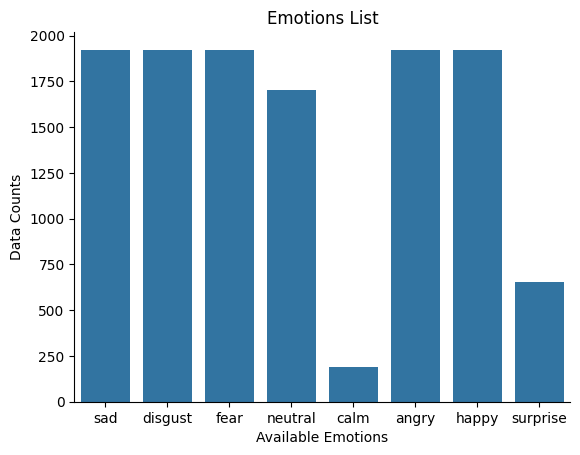

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Emotions List')
sns.countplot(x=mergedDataSet["Emotions"])
plt.ylabel('Data Counts')
plt.xlabel('Available Emotions')
sns.despine()
plt.show()

In [35]:
mergedDataSet

,Emotions,FilePath
411,sad,DataSets/ravdess/Actor_10/03-01-04-02-01-02-10...
1310,disgust,DataSets/CREMA-D/1001_IWW_DIS_XX.wav
1379,sad,DataSets/CREMA-D/1050_IEO_SAD_HI.wav
5203,fear,DataSets/CREMA-D/1051_IOM_FEA_XX.wav
3707,neutral,DataSets/CREMA-D/1032_ITS_NEU_XX.wav
...,...,...
569,happy,DataSets/TESS/OAF_happy/OAF_rain_happy.wav
535,angry,DataSets/ravdess/Actor_04/03-01-05-02-02-01-04...
4304,angry,DataSets/CREMA-D/1091_MTI_ANG_XX.wav
4652,fear,DataSets/CREMA-D/1071_MTI_FEA_XX.wav
